<IPython.core.display.Javascript object>


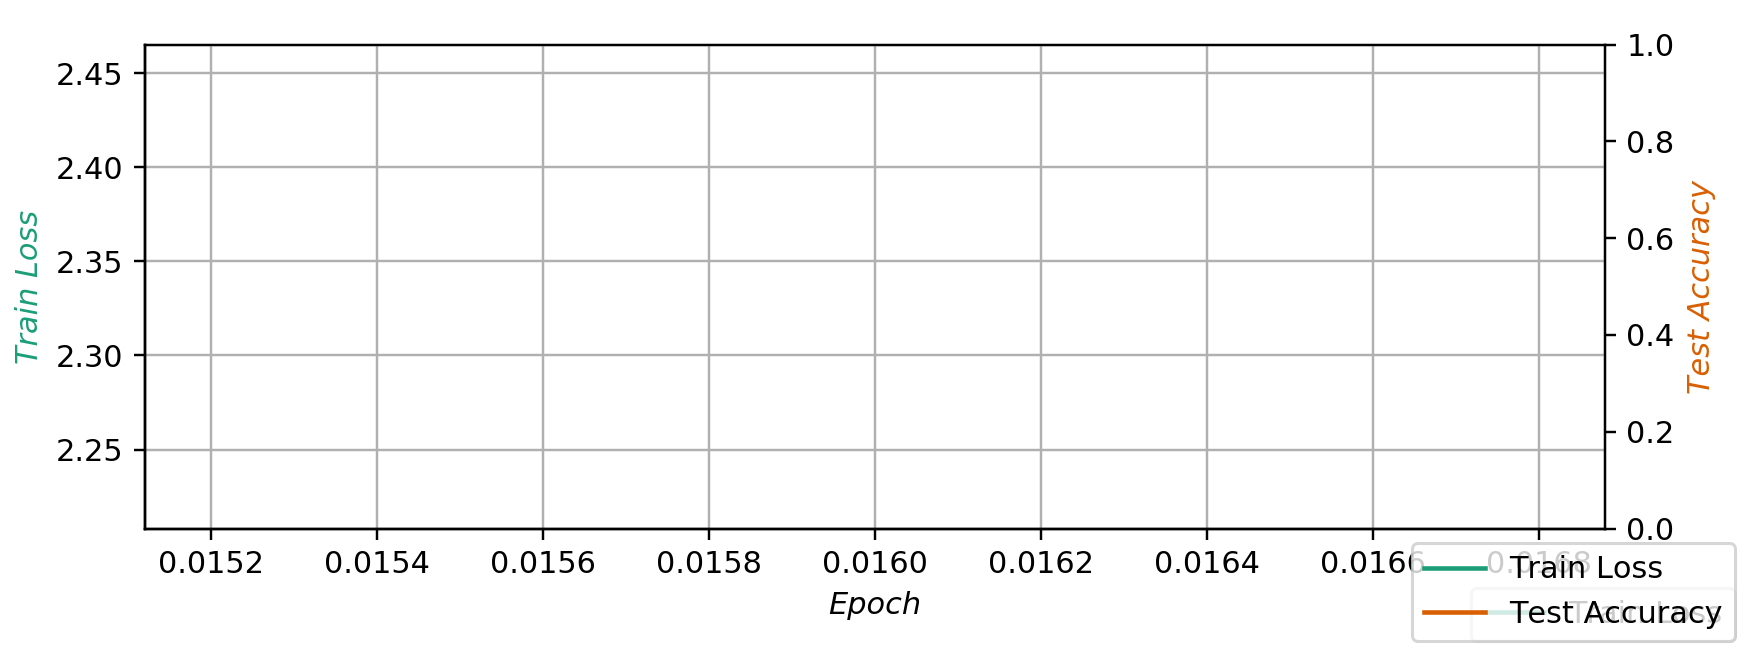

In [1]:
%matplotlib notebook
import tensorwatch as tw

train_loss = tw.open('lambda v:(v.metrics.epochf, v.metrics.batch_loss)', event_name="batch",
                     xtitle='Epoch', ytitle='Train Loss', clear_after_end=False, type='mpl-line')
train_loss.show()

test_acc = tw.open('lambda v:(v.metrics.epochf, v.metrics.epoch_loss)', event_name="batch",
                     xtitle='Epoch', ytitle='Test Accuracy', clear_after_end=False, yrange=(0,1), 
                     vis=train_loss, cli_id=1, type='mpl-line')

<IPython.core.display.Javascript object>


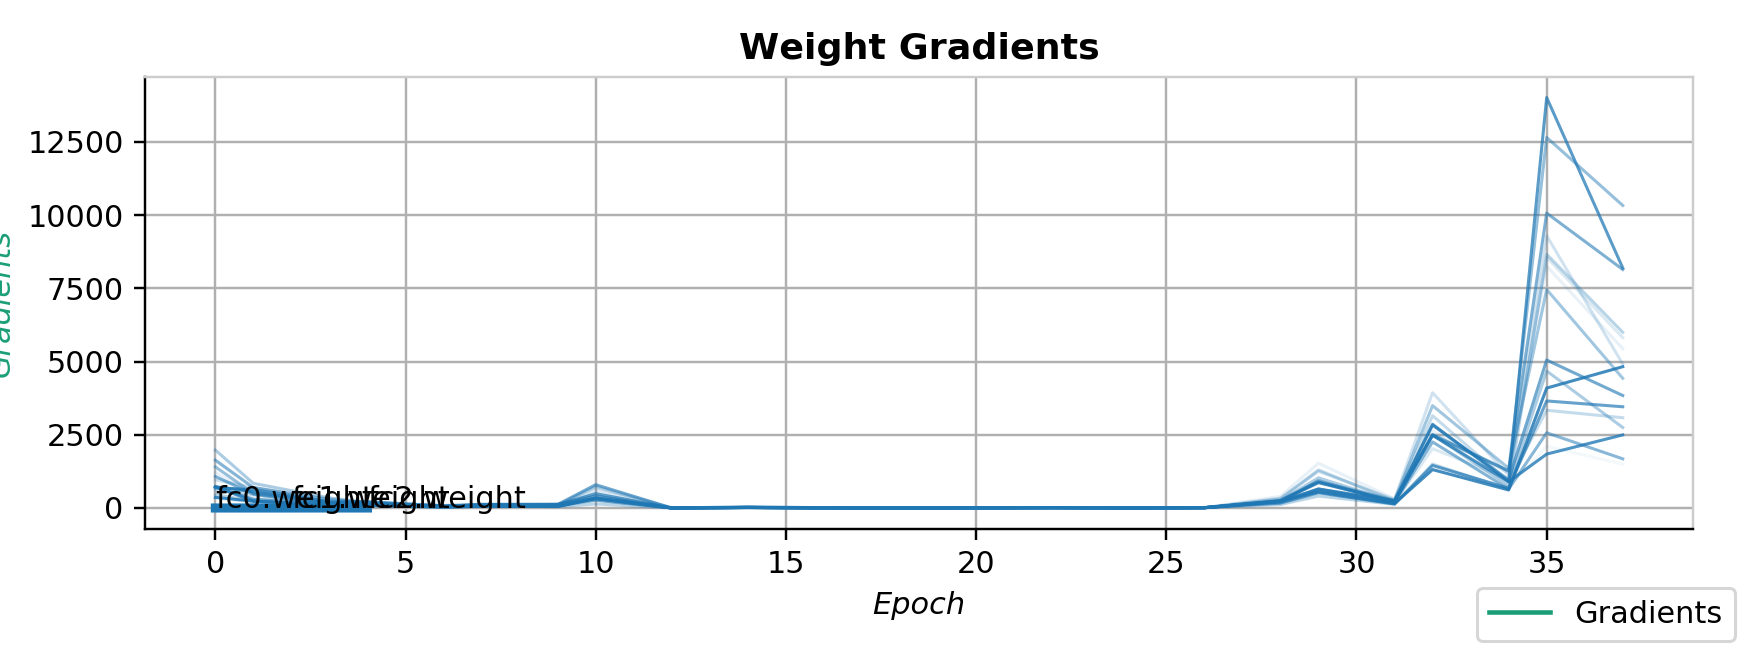

In [2]:
grads = tw.open('lambda d:agg_params(d.model, lambda p: p.grad.abs().mean().item())', event_name='batch', throttle=1,
               title="Weight Gradients",  xtitle='Epoch', ytitle='Gradients', clear_after_each=True, type='mpl-line',
               clear_after_end=False, history_len=20)
grads.show()

<IPython.core.display.Javascript object>


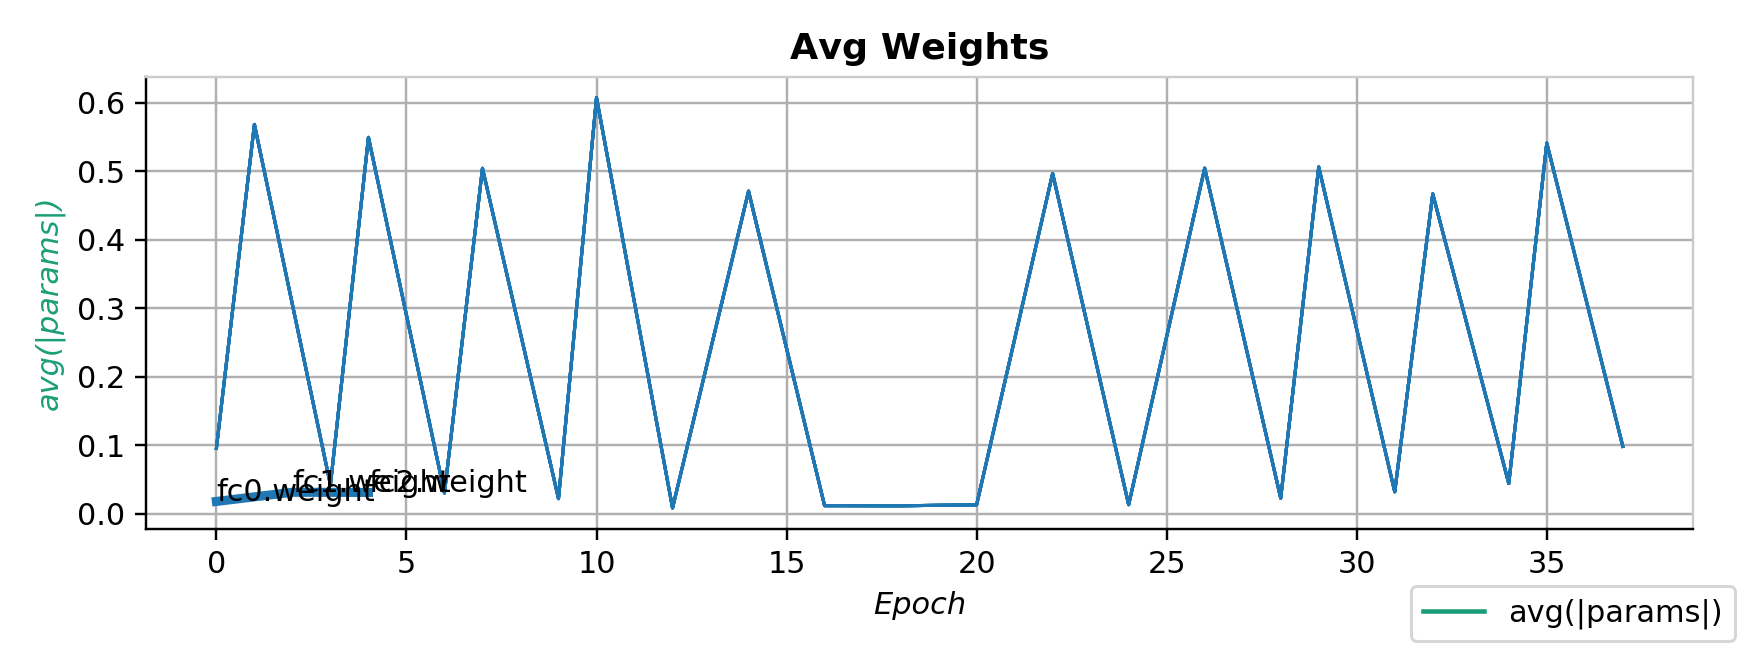

In [3]:
params = tw.open('lambda d:agg_params(d.model, lambda p: p.abs().mean().item())', event_name='batch', throttle=1,
               title="Avg Weights",  xtitle='Epoch', ytitle='avg(|params|)', clear_after_each=True, type='mpl-line',
               clear_after_end=False, history_len=20)
params.show()

<IPython.core.display.Javascript object>


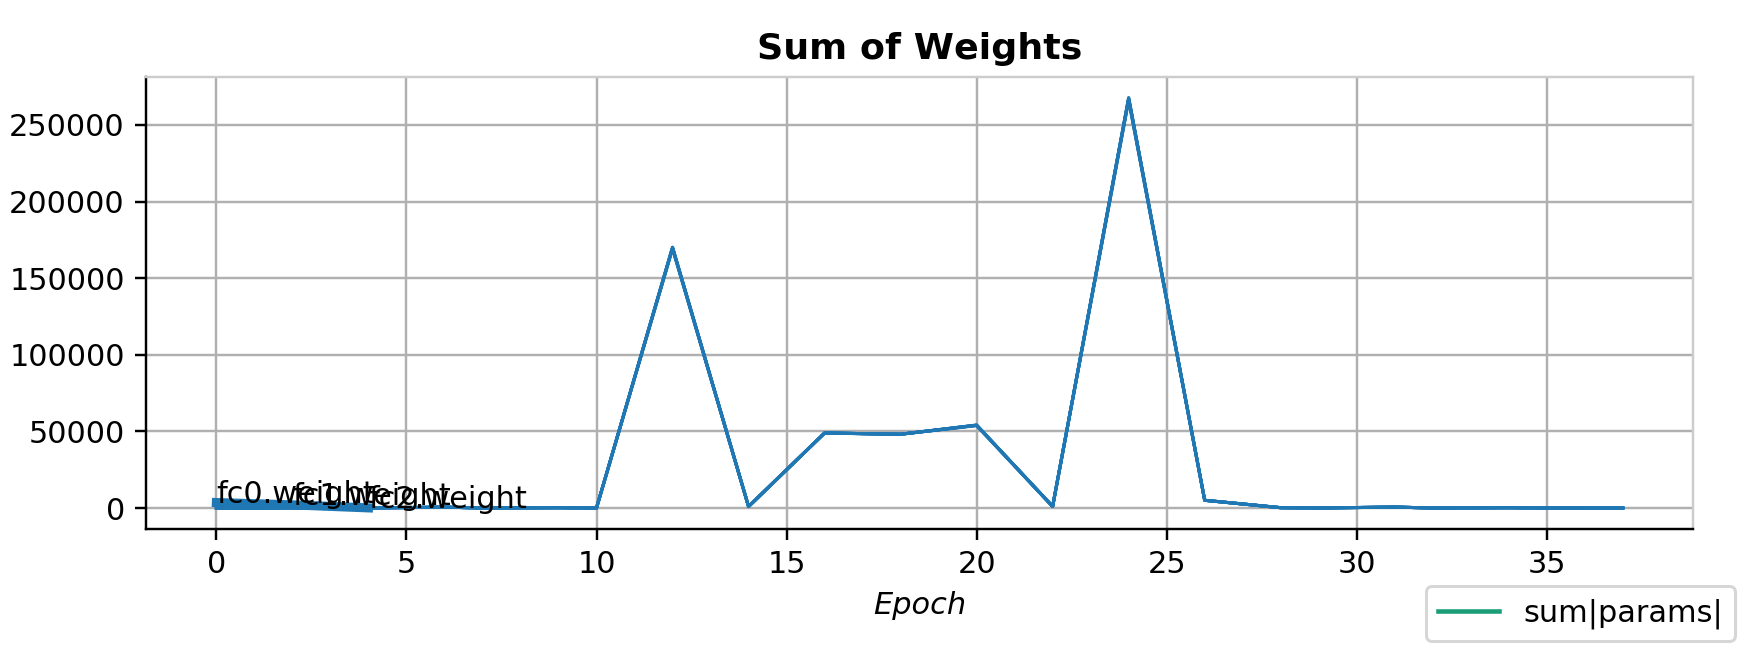

In [4]:
params_sum = tw.open('lambda d:agg_params(d.model, lambda p: p.abs().sum().item())', event_name='batch', throttle=1,
               title="Sum of Weights",  xtitle='Epoch', ytitle='sum|params|', clear_after_each=True, type='mpl-line',
               clear_after_end=False, history_len=20)
params_sum.show()

<IPython.core.display.Javascript object>


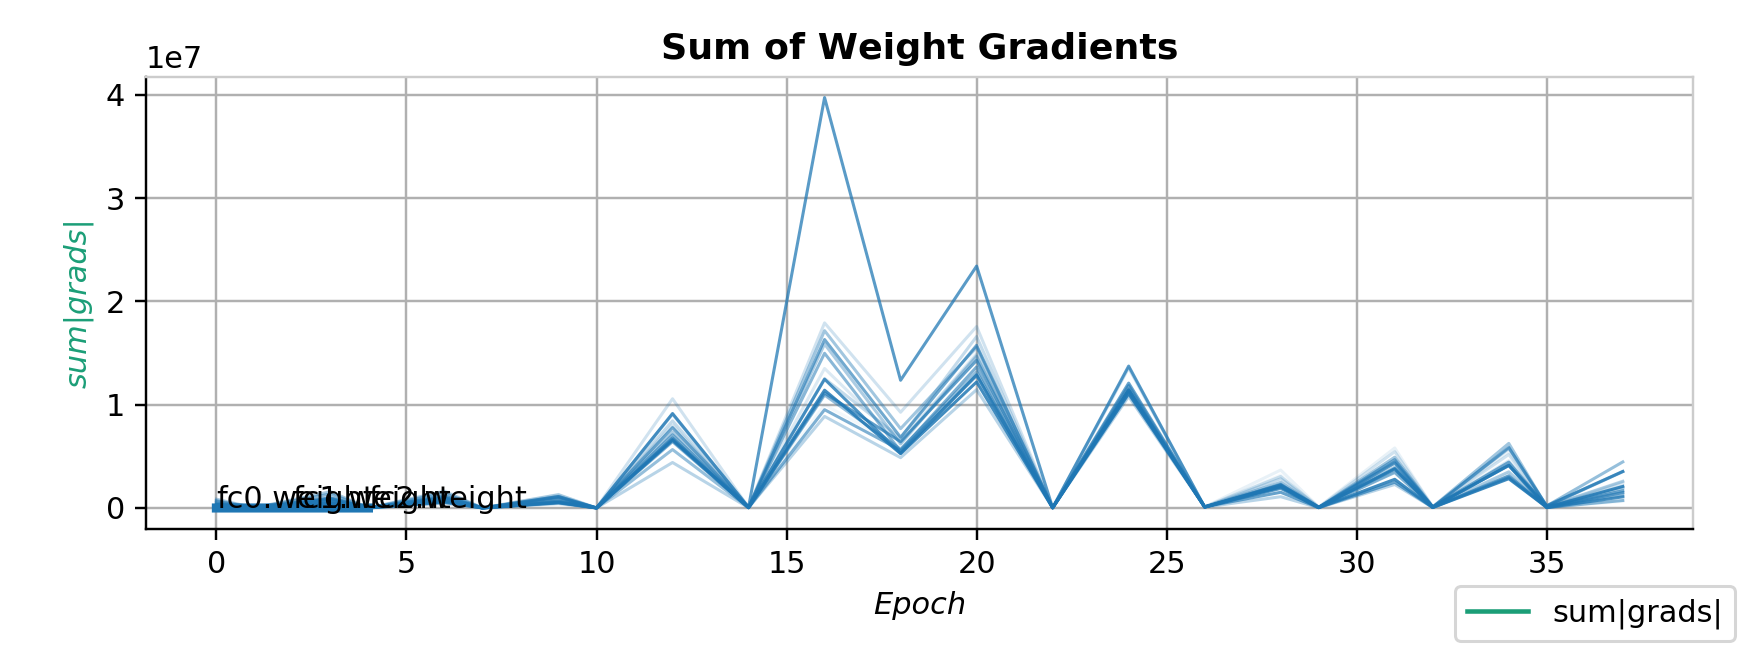

In [5]:
params = tw.open('lambda d:agg_params(d.model, lambda p: p.grad.abs().sum().item())', event_name='batch', throttle=1,
               title="Sum of Weight Gradients",  xtitle='Epoch', ytitle='sum|grads|', clear_after_each=True, type='mpl-line',
               clear_after_end=False, history_len=20)
params.show()

<IPython.core.display.Javascript object>


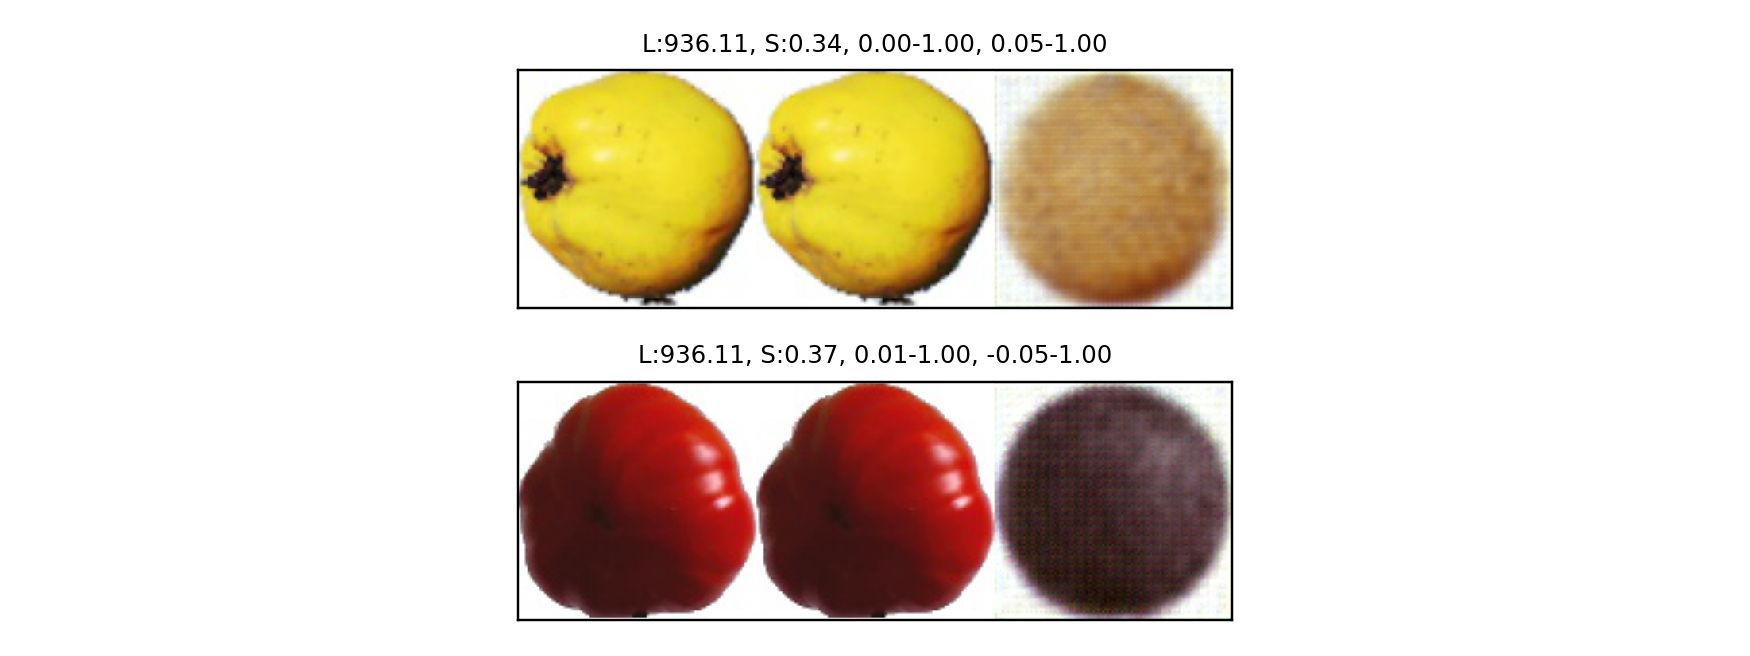

In [6]:
imgs = tw.open("top(l, out_xform=pyt_img_img_out_xform, group_key=lambda x:'', topk=3, order='rnd')", 
               event_name='batch', throttle=1, type='image', img_width=100, img_height=100, viz_img_scale=3, cols=1, rows=2)
imgs.show()